<a href="https://colab.research.google.com/github/ducpb/dog-cat-kaggle/blob/master/test_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2
)
val_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
batch_size = 20
height, width = (150,150)

train_generator = train_datagen.flow_from_directory(
        './drive/My Drive/Colab Notebooks/data/train',
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        './drive/My Drive/Colab Notebooks/data/validation',
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
in_put = layers.Input(shape=(150,150,3))
x = layers.Conv2D(24, 3, activation='relu')(in_put)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(48, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(96, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.4)(x)
out_put = layers.Dense(2, activation='softmax')(x)

model = Model(in_put, out_put)
model.summary();

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 24)      672       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 48)        10416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 96)        41568     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 96)        0     

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['acc'])

In [0]:
H =model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/100
100/100 - 27s - loss: 0.6668 - acc: 0.5935 - val_loss: 0.6639 - val_acc: 0.5780
Epoch 2/100
100/100 - 24s - loss: 0.6572 - acc: 0.6010 - val_loss: 0.6108 - val_acc: 0.6880
Epoch 3/100
100/100 - 24s - loss: 0.6424 - acc: 0.6125 - val_loss: 0.6021 - val_acc: 0.6480
Epoch 4/100
100/100 - 24s - loss: 0.6145 - acc: 0.6530 - val_loss: 0.6252 - val_acc: 0.6260
Epoch 5/100
100/100 - 24s - loss: 0.6032 - acc: 0.6540 - val_loss: 0.5694 - val_acc: 0.6920
Epoch 6/100
100/100 - 24s - loss: 0.5942 - acc: 0.6760 - val_loss: 0.5490 - val_acc: 0.7020
Epoch 7/100
100/100 - 24s - loss: 0.5923 - acc: 0.6755 - val_loss: 0.5539 - val_acc: 0.7090
Epoch 8/100
100/100 - 24s - loss: 0.6001 - acc: 0.6615 - val_loss: 0.5566 - val_acc: 0.6920
Epoch 9/100
100/100 - 24s - loss: 0.5770 - acc: 0.6885 - val_loss: 0.5356 - val_acc: 0.7290
Epoch 10/100
100/100 - 24s - loss: 0.5628 - acc: 0.7130 - val_loss: 0.5663 - val_acc: 0.6960
Epoch 11/100
100/100 - 24s - loss: 0.5657 - acc: 0.7125 - val_loss: 0.5352 - va

Text(0.5, 1.0, 'Training and validation loss')

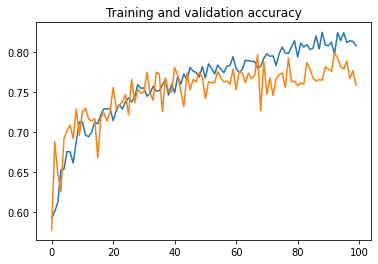

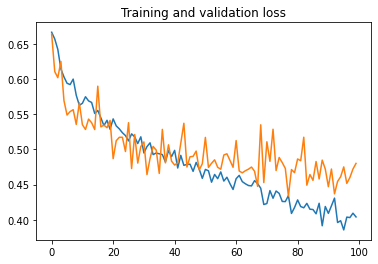

In [0]:
acc = H.history['acc']
val_acc = H.history['val_acc']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')